Support Vector Regression (SVR)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [3]:
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [5]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [6]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [7]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [8]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [9]:
y = y.reshape(len(y),1)
#Standart scaler parametre olarak 2d array bekler o yüzden y'i düzenleyeceğiz.

In [10]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [11]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [12]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [13]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [14]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [15]:
y = y.ravel()
regressor = SVR(kernel='rbf')  #kullanacağımız svm kernel tipi  -> Gauissian Radial Basis Function
regressor.fit(X, y)

SVR()

In [16]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

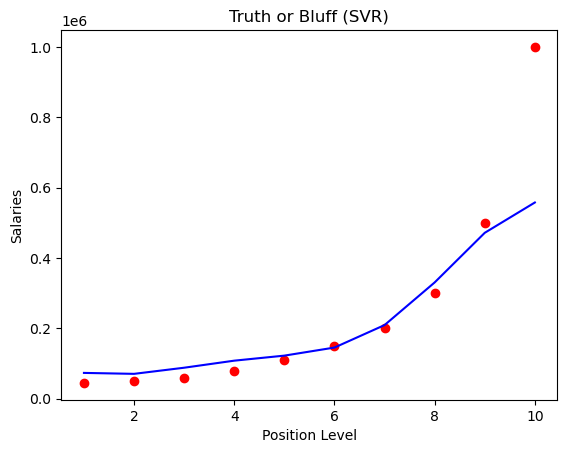

In [17]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y.reshape(-1,1)), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salaries')
plt.show()

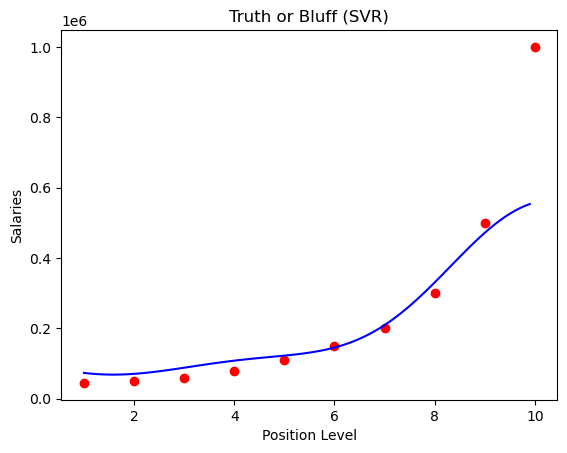

In [18]:
X_grid = np.arange(np.min(sc_X.inverse_transform(X)), np.max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y.reshape(-1,1)), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salaries')
plt.show()